# SORU 3

`3.` **Ekli data üzerindeki aşağıda yer alan kolonların birbirleriyle olan korelasyonlarını, covaryanslarını, Pearson Correlation Coefficientlarını, Spearman Rank Coefficientlarını ve Effect Size'larını bularak sözel ve karşılaştırmalı olarak yorumlayalım**

In [4]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np


In [36]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [37]:
df = df.drop(["id", "Unnamed: 32"], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
data = df.iloc[:,[1,4,6]]
data.head()

,radius_mean,area_mean,compactness_mean
0,17.99,1001.0,0.27760
1,20.57,1326.0,0.07864
2,19.69,1203.0,0.15990
3,11.42,386.1,0.28390
4,20.29,1297.0,0.13280


## Korelasyon

Korelasyon kısaca iki değişkenin birbiri ile olan ilişkisini ve derecesini gösterir. 
Değişkenlerimiz arasında -1 ve 1 arasında bir derecelendirme yapar. Fakat bu derecelendirmelere bakarak her zaman neden-sonuç ilişkisi kuramayız. Örneğin doğal olarak radius_mean arttığı için area_mean artıyor olabilir fakat her zaman bu geçerli değildir.


In [7]:
data.corr()

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.987357,0.506124
area_mean,0.987357,1.000000,0.498502
compactness_mean,0.506124,0.498502,1.000000


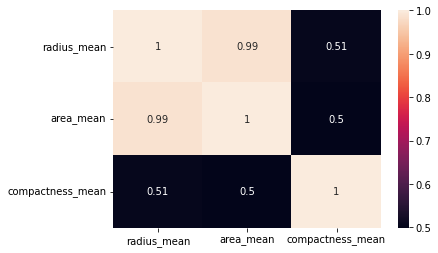

In [8]:
# Korelasyon ısı haritası
sns.heatmap(data.corr(), annot=True)

## Kovaryans

Kovaryans kısaca iki değişken arasındaki ilişkiyi gösterir. İki değişkenin ilişkili olup olmadığını öğrenmenin en basit yolu bu iki değişkenin birbirlerine göre değişimini gösteren kovaryans değerini hesaplamaktır.
İki değişken arasındaki ilişki yok ise 0, ters ise "negatif", doğru ise "pozitif" değerler döndürür.

In [9]:
data.cov()

,radius_mean,area_mean,compactness_mean
radius_mean,12.418920,1224.483409,0.094197
area_mean,1224.483409,123843.554318,9.264931
compactness_mean,0.094197,9.264931,0.002789


## Pearson correlation coefficient

In [10]:
import scipy.stats

In [ ]:
# radius_mean - area_mean
scipy.stats.pearsonr(data.radius_mean, data.area_mean)
print("r: ",scipy.stats.pearsonr(data.radius_mean, data.area_mean)[0])
print("P-value: ",scipy.stats.pearsonr(data.radius_mean, data.area_mean)[1])

r:  0.9873571700566125
P-value:  0.0


In [ ]:
# radius_mean - compactness_mean
scipy.stats.pearsonr(data.radius_mean, data.compactness_mean)
print("r: ",scipy.stats.pearsonr(data.radius_mean, data.compactness_mean)[0])
print("P-value: ",scipy.stats.pearsonr(data.radius_mean, data.compactness_mean)[1])

r:  0.5061235775263633
P-value:  2.4142374076953946e-38


In [ ]:
# area_mean - compactness_mean
scipy.stats.pearsonr(data.area_mean, data.compactness_mean)
print("r: ",scipy.stats.pearsonr(data.area_mean, data.compactness_mean)[0])
print("P-value: ",scipy.stats.pearsonr(data.area_mean, data.compactness_mean)[1])

r:  0.49850168215241175
P-value:  4.469262412798543e-37




---


* **H0: Değişkenler arasındaki korelasyon anlamsız.**  
* **H1: Değişkenler arasındaki korelasyon anlamlı.**  
* **p-value = 0.05**



---
**Yaklaşım - 1**

> Tüm kolonlar arasında "Pearson Korelasyonu" sonucu bulduğumuz p-value değerini bulduktan sonra önceden belirlediğim p-value değeri ile karşılaştırabiliriz.

> H0 hipotezini çürütmek için değişkenler arasında anlamlı bir ilişki bulmalıyız. Bunun için "Pearson Korelasyon" işlemi sonucunda bulduğumuz p-value değeri bizim belirlediğimiz p-value değerini karşılaştırmalıyız.



>>> Bulunan p-value < 0.05 ise H0 hipotezini reddederiz.
>>> Bulunan p-value > 0.05 ise H0 hipotezini kabul ederiz.



---

* "radius_mean" ve "area_mean" kolonları için Pearson analizi sonucu bulduğumuz p-value değeri: "0.0".

>>> 0.0 < 0.05 olduğu için H0 hipotezini redderiz. Yani "radius_mean" ve "area_mean" kolonları arasındaki ilişki anlamlıdır.

* "radius_mean" ve "compactness_mean" kolonları için Pearson analizi sonucu bulduğumuz p-value değeri: "2.4142374076953946e-38".

>>> 2.4142374076953946e-38 < 0.05 olduğu için H0 hipotezini redderiz. Yani "radius_mean" ve "compactness_mean" kolonları arasındaki ilişki anlamlıdır.

* "area_mean" ve "compactness_mean" kolonları için Pearson analizi sonucu bulduğumuz p-value değeri: "4.469262412798543e-37".

>>> 4.469262412798543e-37 < 0.05 olduğu için H0 hipotezini redderiz. Yani "area_mean" ve "compactness_mean" kolonları arasındaki ilişki anlamlıdır.

---













**Yaklaşım - 2**

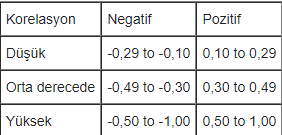
> Tüm kolonlar arasında "Pearson Korelasyonu" sonucu bulduğumuz "r" değerine göre yorum yapabiliriz.

* "radius_mean" ve "area_mean" kolonları için "Pearson correlation coefficient" r değeri: "0.9873571700566125"

* "radius_mean" ve "compactness_mean" kolonları için "Pearson correlation coefficient" r değeri: "0.5061235775263633"

* "area_mean" ve "compactness_mean" kolonları için "Pearson correlation coefficient" r değeri: "0.49850168215241175"

*Bulduğumuz "r" değerlerine göre değerlendirme yapacak olursak;*

>> * "radius_mean" ve "area_mean" kolonları arasında pozitif çok kuvvetli bir ilişki, 
>> * "radius_mean" ve "compactness_mean" kolonları için pozitif kuvvetli bir ilişki ve
>> * "area_mean" ve "compactness_mean" kolonları için pozitif kuvvetli bir ilişki var diyebiliriz.

---

***Özetle kolonlar arasındaki ilişkileri anlam bakımından sıralayacak olursak;***

**(radius_mean-area_mean) > (radius_mean-compactness_mean) > (area_mean-compactness_mean)**




## Spearman correlation coefficient

In [ ]:
# radius_mean - area_mean
scipy.stats.spearmanr(data.radius_mean, data.area_mean)
print("ρ (rho): ", scipy.stats.spearmanr(data.radius_mean, data.area_mean)[0])
print("P-value: ", scipy.stats.spearmanr(data.radius_mean, data.area_mean)[1])

ρ (rho):  0.9996020278067481
P-value:  0.0


In [ ]:
# radius_mean - compactness_mean
scipy.stats.spearmanr(data.radius_mean, data.compactness_mean)
print("ρ (rho): ", scipy.stats.spearmanr(data.radius_mean, data.compactness_mean)[0])
print("P-value: ", scipy.stats.spearmanr(data.radius_mean, data.compactness_mean)[1])

ρ (rho):  0.49757760995795647
P-value:  6.3349241442214955e-37


In [ ]:
# area_mean - compactness_mean
scipy.stats.spearmanr(data.area_mean, data.compactness_mean)
print("ρ (rho):", scipy.stats.spearmanr(data.area_mean, data.compactness_mean)[0])
print("P-value: ", scipy.stats.spearmanr(data.area_mean, data.compactness_mean)[1])

ρ (rho): 0.4889883974982949
P-value:  1.5419515156000542e-35




---
**Yaklaşım - 1**

* "radius_mean" ve "area_mean" kolonları için Spearman analizi sonucu bulduğumuz p-value değeri: "0.0".

>>> 0.0 < 0.05 olduğu için H0 hipotezini redderiz. Yani "radius_mean" ve "area_mean" kolonları arasındaki ilişki anlamlıdır.

* "radius_mean" ve "compactness_mean" kolonları için Pearson analizi sonucu bulduğumuz p-value değeri: "6.3349241442214955e-37".

>>> 6.3349241442214955e-37 < 0.05 olduğu için H0 hipotezini redderiz. Yani "radius_mean" ve "compactness_mean" kolonları arasındaki ilişki anlamlıdır.

* "area_mean" ve "compactness_mean" kolonları için Pearson analizi sonucu bulduğumuz p-value değeri: "1.5419515156000542e-35".

>>> 1.5419515156000542e-35 < 0.05 olduğu için H0 hipotezini redderiz. Yani "area_mean" ve "compactness_mean" kolonları arasındaki ilişki anlamlıdır.

---

**Yaklaşım - 2**

"Pearson correlation coefficient" ile aynı yorumu yapabiliriz.

> Tüm kolonlar arasında "Spearman correlation coefficient" sonucu bulduğumuz "ρ (rho)" değerine göre yorum yapabiliriz.

* "radius_mean" ve "area_mean" kolonları için "Spearman correlation coefficient" ρ (rho) değeri: "0.9996020278067481"

* "radius_mean" ve "compactness_mean" kolonları için "Spearman correlation coefficient" ρ (rho) değeri: "0.49757760995795647"

* "area_mean" ve "compactness_mean" kolonları için "Spearman correlation coefficient" ρ (rho) değeri: "0.4889883974982949"

*Bulduğumuz "ρ (rho)" değerlerine göre değerlendirme yapacak olursak;*

>> * "radius_mean" ve "area_mean" kolonları arasında pozitif çok kuvvetli bir ilişki, 
>> * "radius_mean" ve "compactness_mean" kolonları için pozitif kuvvetli bir ilişki ve
>> * "area_mean" ve "compactness_mean" kolonları için pozitif kuvvetli bir ilişki var diyebiliriz.

---

***Özetle kolonlar arasındaki ilişkileri anlam bakımından sıralayacak olursak;***

**(radius_mean-area_mean) > (radius_mean-compactness_mean) > (area_mean-compactness_mean)**


## Effect Size

* Effect size bize iki grubun bağlılığını gösterir. İki grup arasındaki farkın veya ilişkinin boyutunu vurgular. Effect size değerinin negatif olması büyüklük hakkında bir bilgi vermez.

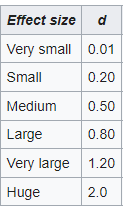

In [14]:
# Cohen's d

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s


In [44]:
rad_vs_area = cohend(data.area_mean.values,data.radius_mean.values)
rad_vs_compactness = cohend(data.radius_mean.values,data.compactness_mean.values)
area_vs_compactness = cohend(data.area_mean.values,data.compactness_mean.values)
print(f"radius_mean ve area_mean için cohen's d değeri: {rad_vs_area}\n")
print(f"radius_mean ve compactness_mean için cohen's d değeri: {rad_vs_compactness}\n")
print(f"area_mean ve compactness_mean için cohen's d değeri: {area_vs_compactness}\n")

radius_mean ve area_mean için cohen's d değeri: 2.5748571535813936

radius_mean ve compactness_mean için cohen's d değeri: 5.626829112228556

area_mean ve compactness_mean için cohen's d değeri: 2.6313393087695855

